In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from module import function
import matplotlib.pyplot as plt
from copy import deepcopy
from importlib import reload
import shutil

In [2]:
NUM_CLASSES = 5
NUM_SAMPLES_PER_CLASS = 1
PATH = "../data/raw/cifar100/data"

In [3]:

# Transfrom for data augmentation
augmentation_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

tensor([4, 2, 0, 1, 3])


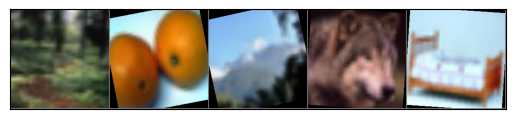

tensor([0, 3, 0, 2, 3])


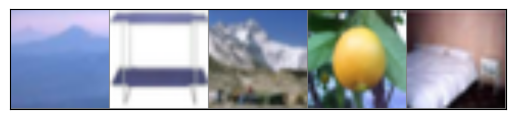

tensor([1, 1, 3, 2, 1, 2, 4, 2, 1, 3, 4, 4, 2, 2, 0])


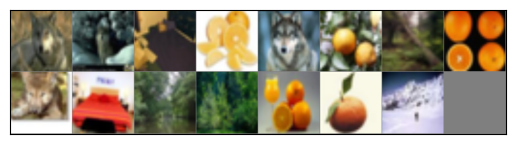

In [4]:
reload(function)
# Transfrom for data augmentation
augmentation_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# データの前処理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
class_seed = 0

# サポートデータセットのインスタンス化
support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)

support_aug = [function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=augmentation_transform, num_classes=5, support_per_class=1, class_seed=class_seed, transform_seed=i) for i in range(1, 10)]

support_aug = torch.utils.data.ConcatDataset([support] + support_aug)

# クエリデータセットのインスタンス化
query = function.QueryDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1,query_per_class=30, class_seed=class_seed)

# Test validation ratio
ratio = 0.5
val_size = int(ratio * len(query))
query_size = len(query) - val_size
# Split the dataset into training and validation sets
torch.manual_seed(class_seed)
query, val = torch.utils.data.random_split(query, [query_size, val_size])


# データローダーの作成
support_loader = DataLoader(support_aug, batch_size=5, shuffle=True)
val_loader = DataLoader(val, batch_size=5, shuffle=False)
query_loader = DataLoader(query, batch_size=15, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])  # Remove x-axis labels
    plt.yticks([])
    plt.show()

for batch in support_loader:
    image, label = batch
    print(label)
    imshow(torchvision.utils.make_grid(image))
    break

for batch in val_loader:
    image, label = batch
    print(label)
    imshow(torchvision.utils.make_grid(image))
    break

for batch in query_loader:
    image, label = batch
    print(label)
    imshow(torchvision.utils.make_grid(image))
    break

tensor([0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
        4, 4])


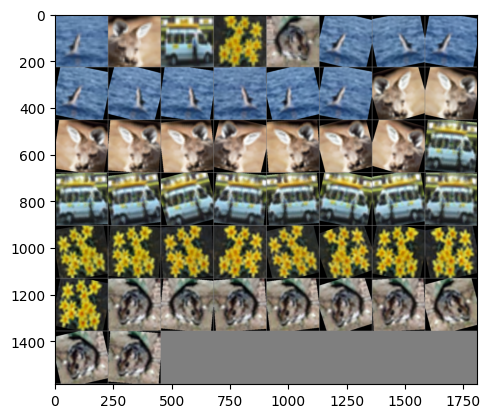

In [8]:
# Check the augmented data with AdAM
class_seed = 4

# サポートデータセットのインスタンス化
support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)
# 使用例
# class_labelsは、クラス名をキーとし、それに対応する整数ラベルを値とする辞書です。
class_labels = {class_name + f"-{class_seed}": idx for idx, class_name in enumerate(support.selected_classes)}
aug_data = function.ImageClassificationDataset('../data/processed', class_labels, transform=augmentation_transform)
support_aug = torch.utils.data.ConcatDataset([support, aug_data])

support_loader = DataLoader(support_aug, batch_size=50, shuffle=False)

for batch in support_loader:
    image, label = batch
    print(label)
    imshow(torchvision.utils.make_grid(image))

tensor([0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
        4, 4])


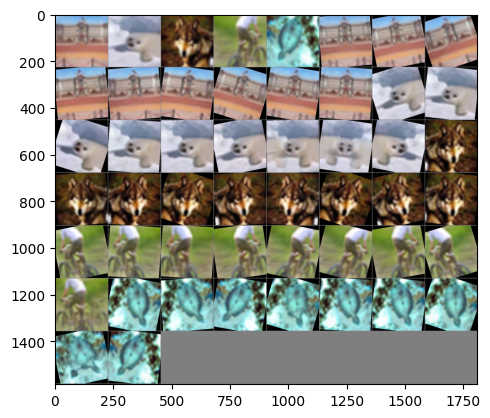

0


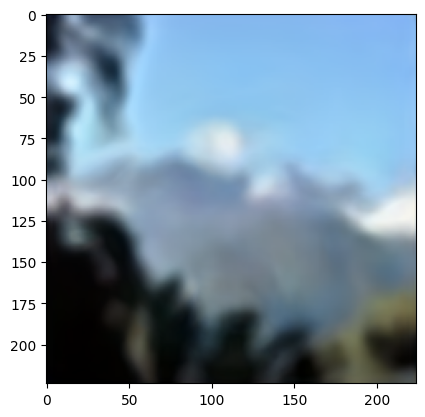

In [26]:
for idx, (image, label) in enumerate(aug_data):
    print(label)
    imshow(torchvision.utils.make_grid(image))
    

In [24]:

for class_seed in range(5):
    support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)
    print(class_seed, support.selected_classes)



0 ['mountain', 'wolf', 'orange', 'bed', 'forest']
1 ['castle', 'seal', 'wolf', 'bicycle', 'flatfish']
2 ['beetle', 'boy', 'bowl', 'man', 'chimpanzee']
3 ['dolphin', 'skunk', 'rocket', 'can', 'maple_tree']
4 ['dolphin', 'kangaroo', 'bus', 'tulip', 'mouse']


In [26]:
for class_seed in range(5):
    support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)
    print(class_seed, support.selected_classes)
    
    # copy support data to AdAM
    for idx, (image, label) in enumerate(support):
        img_path = support.images[idx]
        class_name = support.selected_classes[label]
        print(img_path)
        print(label)
        print(class_name)
        # imshow(torchvision.utils.make_grid(image))
        folder_path = f"../../AdAM/data/1-shot-{class_name}-{class_seed}/images"
        os.makedirs(folder_path, exist_ok=True)
        for i in range(10):
            shutil.copy(img_path, folder_path+f"/{os.path.basename(img_path)}_{i}.png")
    

0 ['mountain', 'wolf', 'orange', 'bed', 'forest']
../data/raw/cifar100/data/mountain/mount_s_000866.png
0
mountain
../data/raw/cifar100/data/wolf/wolf_s_000058.png
1
wolf
../data/raw/cifar100/data/orange/navel_orange_s_001102.png
2
orange
../data/raw/cifar100/data/bed/bed_s_001107.png
3
bed
../data/raw/cifar100/data/forest/forest_s_001882.png
4
forest
1 ['castle', 'seal', 'wolf', 'bicycle', 'flatfish']
../data/raw/cifar100/data/castle/palace_s_000713.png
0
castle
../data/raw/cifar100/data/seal/seal_s_000236.png
1
seal
../data/raw/cifar100/data/wolf/gray_wolf_s_001256.png
2
wolf
../data/raw/cifar100/data/bicycle/bicycle_s_001107.png
3
bicycle
../data/raw/cifar100/data/flatfish/flounder_s_002036.png
4
flatfish
2 ['beetle', 'boy', 'bowl', 'man', 'chimpanzee']
../data/raw/cifar100/data/beetle/tiger_beetle_s_000354.png
0
beetle
../data/raw/cifar100/data/boy/boy_s_002243.png
1
boy
../data/raw/cifar100/data/bowl/bowl_s_000870.png
2
bowl
../data/raw/cifar100/data/man/abel_s_000769.png
3
man
..

In [39]:
print(len(support_aug))
print(len(val))
print(len(query))

50
75
75


In [40]:
from torchvision.models import vit_h_14, ViT_H_14_Weights

# Get the weights of the pretrained model
weights = ViT_H_14_Weights.IMAGENET1K_SWAG_LINEAR_V1

# Get the pretrained model
model = vit_h_14(weights=weights)




In [41]:

model.heads = nn.Sequential(nn.Linear(1280, 1000), 
                            nn.ReLU(),
                            nn.Linear(1000, 512),
                            nn.ReLU(),
                            nn.Linear(512, 5))

# Make the parameter of the last layer trainable
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last layer
for param in model.heads.parameters():
    param.requires_grad = True

In [42]:
# Define the loss function and optimizer
device = torch.device("cuda:3")
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), weight_decay=1e-5, lr=0.00005)
model = model.to(device)
model

VisionTransformer(
  (conv_proj): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1280, out_features=1280, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1280, out_features=5120, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=5120, out_features=1280, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
       

In [43]:


epochs = 40

history_train = {'loss': [], 'accuracy': []}
history_val = {'loss': [], 'accuracy': []}
history_test = {'loss': [], 'accuracy': []}

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    for inputs, labels in support_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total += labels.size(0)
        predicted = torch.max(outputs.data, 1)[1]
        correct += (predicted == labels.squeeze()).sum().item()
    
    history_train['loss'].append(loss.item())
    history_train['accuracy'].append(correct/total)
    
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
      
            val_loss += criterion(outputs, labels)
            total += labels.size(0)
            predicted = torch.max(outputs.data, 1)[1]
   
            correct += (predicted == labels.squeeze()).sum().item()
        val_loss = val_loss/len(val_loader)
        history_val['loss'].append(val_loss.item())
        history_val['accuracy'].append(correct/total)
        
    print(f'Epoch {epoch+1}/{epochs}, Loss: {val_loss:.4f}, Accuracy: {correct/total:.4f}')
    
    model.eval()
    query_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in query_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            query_loss += criterion(outputs, labels)
            total += labels.size(0)
            predicted = torch.max(outputs.data, 1)[1]

            correct += (predicted == labels.squeeze()).sum().item()
        query_loss = query_loss/len(query_loader)
        history_test['loss'].append(query_loss.item())
        history_test['accuracy'].append(correct/total)

    print(f'Loss: {query_loss:.4f}, Accuracy: {correct/total:.4f}')

history = {'train': history_train, 'val': history_val, 'test': history_test}
np.save('../data/result/fsl/history.npy', history)

Epoch 1/40, Loss: 1.5336, Accuracy: 0.6400
Loss: 1.5426, Accuracy: 0.6133
Epoch 2/40, Loss: 1.4423, Accuracy: 0.8667
Loss: 1.4597, Accuracy: 0.8267
Epoch 3/40, Loss: 1.3368, Accuracy: 0.8133
Loss: 1.3558, Accuracy: 0.8133
Epoch 4/40, Loss: 1.2005, Accuracy: 0.8267
Loss: 1.2244, Accuracy: 0.8400
Epoch 5/40, Loss: 1.0740, Accuracy: 0.8000
Loss: 1.0974, Accuracy: 0.8133
Epoch 6/40, Loss: 0.9709, Accuracy: 0.7733
Loss: 0.9930, Accuracy: 0.8133
Epoch 7/40, Loss: 0.8876, Accuracy: 0.7733
Loss: 0.9101, Accuracy: 0.8400
Epoch 8/40, Loss: 0.8083, Accuracy: 0.8933
Loss: 0.8409, Accuracy: 0.8667
Epoch 9/40, Loss: 0.7561, Accuracy: 0.9067
Loss: 0.7905, Accuracy: 0.8933
Epoch 10/40, Loss: 0.7138, Accuracy: 0.9067
Loss: 0.7529, Accuracy: 0.9067
Epoch 11/40, Loss: 0.6834, Accuracy: 0.9067
Loss: 0.7227, Accuracy: 0.9067
Epoch 12/40, Loss: 0.6588, Accuracy: 0.9067
Loss: 0.6986, Accuracy: 0.9067
Epoch 13/40, Loss: 0.6298, Accuracy: 0.9200
Loss: 0.6754, Accuracy: 0.8933
Epoch 14/40, Loss: 0.6007, Accurac

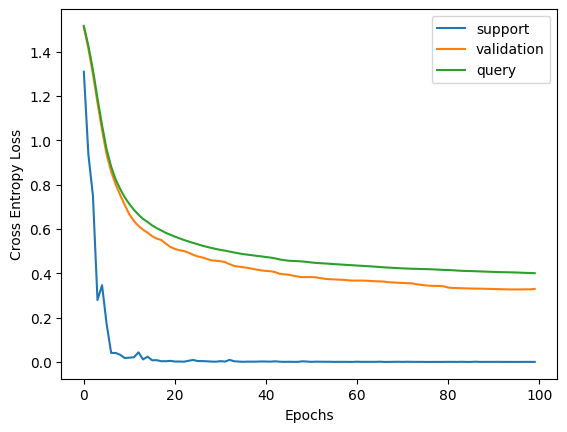

In [6]:
history = np.load('../data/result/aug_0307/history_0.npy', allow_pickle=True).item()

t = "loss"
plt.plot(history['train'][t], label='support')
plt.plot(history['val'][t], label='validation')
plt.plot(history['test'][t], label='query')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
# plt.savefig('../data/result/base_no_aug/loss.pdf')

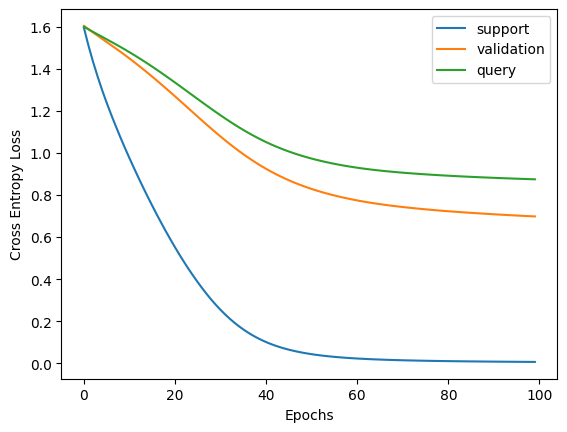

In [5]:
history = np.load('../data/result/base_0307/history_0.npy', allow_pickle=True).item()
plt.plot(history['train'][t], label='support')
plt.plot(history['val'][t], label='validation')
plt.plot(history['test'][t], label='query')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()

In [45]:
history = np.load('../data/result/fsl/history_aug.npy', allow_pickle=True).item()


print(history['test']['accuracy'])


[0.7466666666666667, 0.8, 0.8266666666666667, 0.8, 0.8133333333333334, 0.8533333333333334, 0.88, 0.8933333333333333, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.8933333333333333, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.9066666666666666, 0.8933333333333333, 0.8933333333333333, 0.8933333333333333, 0.9066666666666666, 0.9066666666666666]


In [31]:
history = np.load('../data/result/fsl/history.npy', allow_pickle=True).item()
history['train']
history['val']
history['test']

{'loss': [1.5761401653289795, 1.5488759279251099],
 'accuracy': [0.3466666666666667, 0.48]}

In [11]:
model.eval()
query_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in query_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        query_loss += criterion(outputs, labels)
        total += labels.size(0)
        predicted = torch.max(outputs.data, 1)[1]

        correct += (predicted == labels.squeeze()).sum().item()

print(f'Loss: {query_loss/len(query_loader):.4f}, Accuracy: {correct/total:.4f}')

Loss: 1.0639, Accuracy: 0.8000


[0.4533333333333333,
 0.5733333333333334,
 0.7066666666666667,
 0.72,
 0.76,
 0.8,
 0.8133333333333334,
 0.8266666666666667,
 0.8133333333333334,
 0.8133333333333334,
 0.84,
 0.8,
 0.7866666666666666,
 0.7866666666666666,
 0.8,
 0.8133333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.84,
 0.84,
 0.8533333333333334,
 0.8666666666666667,
 0.88,
 0.88,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.88,
 0.88,
 0.8666666666666667,
 0.8666666666666667,
 0.88,
 0.8666666666666667,
 0.8666666666666667,
 0.88,
 0.8666666666666667,
 0.8666666666666667,
 0.88,
 0.88,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.866666

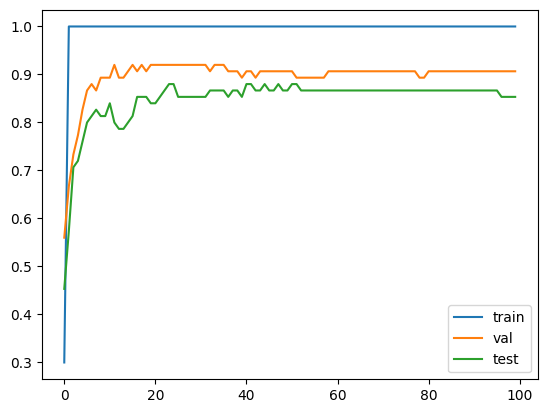

In [50]:


history = np.load('../data/result/fsl/history_0.npy', allow_pickle=True).item()

plt.plot(history['train']['accuracy'], label='train')
plt.plot(history['val']['accuracy'], label='val')
plt.plot(history['test']['accuracy'], label='test')
plt.legend()

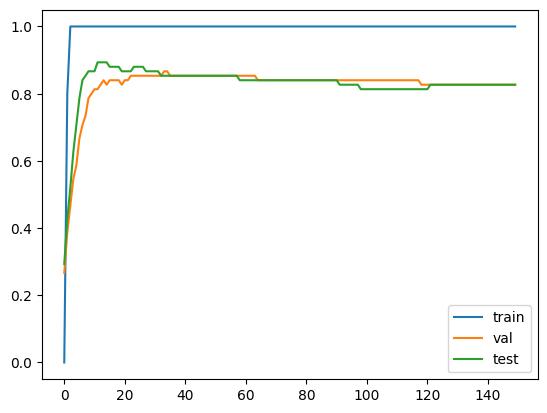

In [43]:
plt.plot(history['train']['accuracy'], label='train')
plt.plot(history['val']['accuracy'], label='val')
plt.plot(history['test']['accuracy'], label='test')
plt.legend()

In [ ]:
for i in range(10):
    history = np.load(f'../data/result/fsl/history_{i}.npy', allow_pickle=True).item()
    plt.figure()
    plt.plot(history['train']['accuracy'], label='train')
    plt.plot(history['val']['accuracy'], label='val')
    plt.plot(history['test']['accuracy'], label='test')
    plt.legend()

In [10]:
num = 5
for mode in ["base", "aug"]:
    print(mode)
    for t in ["train", "val", "test"]:
        accs = []
        for i in range(num):
            history = np.load(f'../data/result/{mode}_0307/history_{i}.npy', allow_pickle=True).item()
            accs.append(history[t]['accuracy'][-1])

        ave_acc = np.mean(accs)
        std_dev = np.std(accs)

        print(f"{t}: {ave_acc:.2f}±{std_dev:.2f}")

base
train: 1.00±0.00
val: 0.79±0.10
test: 0.75±0.10
aug
train: 1.00±0.00
val: 0.83±0.08
test: 0.81±0.10


In [11]:
mode = "adam"
num = 5
for t in ["train", "val", "test"]:
    accs = []
    for i in range(num):
        history = np.load(f'../data/result/{mode}_0309/history_{i}.npy', allow_pickle=True).item()
        accs.append(history[t]['accuracy'][-1])

    ave_acc = np.mean(accs)
    std_dev = np.std(accs)

    print(f"{t}: {ave_acc:.2f}±{std_dev:.2f}")

train: 1.00±0.00
val: 0.83±0.08
test: 0.82±0.11


In [2]:
for name in ["base_0307", "aug_0307", "adam_0309"]:
    print(name)
    for i in range(5):
        history = np.load(f'../data/result/{name}/history_{i}.npy', allow_pickle=True).item()
        print(i,history['test']['accuracy'][-1])

base_0307
0 0.6933333333333334
1 0.8266666666666667
2 0.5866666666666667
3 0.7733333333333333
4 0.88
aug_0307
0 0.8666666666666667
1 0.7466666666666667
2 0.6933333333333334
3 0.76
4 0.9866666666666667
adam_0309
0 0.9066666666666666
1 0.7733333333333333
2 0.7066666666666667
3 0.7333333333333333
4 0.9866666666666667


In [10]:
methods = ["Without-DA", "Normal-DA", "AdAM-DA"]

for i, name in enumerate(["base_0307", "aug_0307", "adam_0309"]):
    print(f'{methods[i]} & ', end='')
    accuracies = []
    for i in range(5):
        history = np.load(f'../data/result/{name}/history_{i}.npy', allow_pickle=True).item()
        accuracy = history['test']['accuracy'][-1]
        accuracies.append(accuracy)
        print(f'${accuracy:.2f}$ & ', end='')
    print(f'${np.mean(accuracies):.2f} \pm {np.std(accuracies):.2f}$ \\\\')

Without-DA & $0.69$ & $0.83$ & $0.59$ & $0.77$ & $0.88$ & $0.75 \pm 0.10$ \\
Normal-DA & $0.87$ & $0.75$ & $0.69$ & $0.76$ & $0.99$ & $0.81 \pm 0.10$ \\
AdAM-DA & $0.91$ & $0.77$ & $0.71$ & $0.73$ & $0.99$ & $0.82 \pm 0.11$ \\


In [38]:

for class_seed in range(5):
    support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)
    print(class_seed, support.selected_classes)



0 ['mountain', 'wolf', 'orange', 'bed', 'forest']
1 ['castle', 'seal', 'wolf', 'bicycle', 'flatfish']
2 ['beetle', 'boy', 'bowl', 'man', 'chimpanzee']
3 ['dolphin', 'skunk', 'rocket', 'can', 'maple_tree']
4 ['dolphin', 'kangaroo', 'bus', 'tulip', 'mouse']


In [91]:
from torchvision.models import vit_h_14
import torch

save_path = "../data/result/fsl"
mode = "aug"
os.makedirs(save_path, exist_ok=True)

model = vit_h_14()
model.heads = nn.Sequential(nn.Linear(1280, 1000), 
                            nn.ReLU(),
                            nn.Linear(1000, 512),
                            nn.ReLU(),
                            nn.Linear(512, 5))

label_result = {}
for class_seed in range(5):
    print("Seed:", class_seed)
    checkpoit = torch.load(f"/media/DATA_18_TB_1/junya/fsl/{mode}_0311/vit_{class_seed}.pth")
    model.load_state_dict(checkpoit)
    # Define the loss function and optimizer
    device = torch.device("cuda:3")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), weight_decay=1e-5, lr=0.00005)
    model = model.to(device)

    query = function.QueryDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1,query_per_class=15, class_seed=class_seed)
    query_loader = DataLoader(query, batch_size=1, shuffle=False)
    
    model.eval()
    query_loss = 0.0
    correct = 0
    total = 0
    # ラベルごとの正解数と総数を格納するための辞書を初期化
    label_correct = {}
    label_total = {}

    with torch.no_grad():
        for inputs, labels in query_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            query_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # ラベルごとの正解数と総数を更新
            for label, prediction in zip(labels, predicted):
                if label.item() not in label_correct:
                    label_correct[label.item()] = 0
                    label_total[label.item()] = 0
                label_correct[label.item()] += (label == prediction).item()
                label_total[label.item()] += 1

    query_loss /= len(query_loader)
    accuracy = correct / total

    # 全体のロスと正解率を出力
    print(f'Loss: {query_loss:.4f}, Accuracy: {accuracy:.4f}')

    # ラベルごとの正解率を計算して出力
    for label in label_correct:
        label_accuracy = label_correct[label] / label_total[label]
        print(f'Label {label} Accuracy: {label_accuracy:.4f}')

    # calculate average
    result = {}
    for label in label_correct:
        label_accuracy = label_correct[label] / label_total[label]
        result[label] = label_accuracy
    result = dict(sorted(result.items(), key=lambda x: x[0]))
    result["mean"] = np.mean(list(result.values()))
    
    label_result[class_seed] = result
    np.save(f"{save_path}/label_result_{mode}.npy", label_result)
    
    




Seed: 0
Loss: 0.3306, Accuracy: 0.8533
Label 0 Accuracy: 0.6000
Label 1 Accuracy: 0.9333
Label 2 Accuracy: 1.0000
Label 3 Accuracy: 1.0000
Label 4 Accuracy: 0.7333
Seed: 1
Loss: 0.6728, Accuracy: 0.7733
Label 0 Accuracy: 0.8667
Label 1 Accuracy: 0.5333
Label 2 Accuracy: 1.0000
Label 3 Accuracy: 0.7333
Label 4 Accuracy: 0.7333
Seed: 2
Loss: 0.9275, Accuracy: 0.7467
Label 0 Accuracy: 0.8667
Label 1 Accuracy: 0.3333
Label 2 Accuracy: 0.8000
Label 3 Accuracy: 0.8667
Label 4 Accuracy: 0.8667
Seed: 3
Loss: 0.5484, Accuracy: 0.7733
Label 0 Accuracy: 1.0000
Label 1 Accuracy: 1.0000
Label 2 Accuracy: 0.6667
Label 3 Accuracy: 0.2000
Label 4 Accuracy: 1.0000
Seed: 4
Loss: 0.2184, Accuracy: 0.9733
Label 0 Accuracy: 1.0000
Label 1 Accuracy: 0.8667
Label 2 Accuracy: 1.0000
Label 3 Accuracy: 1.0000
Label 4 Accuracy: 1.0000


In [115]:
base_result = np.load("../data/result/fsl_0311/label_result_base.npy", allow_pickle=True).item()
aug_result = np.load("../data/result/fsl_0311/label_result_aug.npy", allow_pickle=True).item()
adam_result = np.load("../data/result/fsl_0311/label_result_adam.npy", allow_pickle=True).item()
results = [base_result, aug_result, adam_result]
methods = ["Without-DA", "Normal-DA", "AdAM-DA"]

for j, result in enumerate(results):
    print(methods[j], end=" & ")
    accuracies = []
    for i in range(5):
        accuracies.append(result[i]["mean"])
    for acc in accuracies:
        print(f"${acc:.2f}$", end=" & ")
    print(f"${np.mean(accuracies):.2f} \pm {np.std(accuracies):.2f}$ \\\\")


Without-DA & $0.77$ & $0.76$ & $0.64$ & $0.77$ & $0.95$ & $0.78 \pm 0.10$ \\
Normal-DA & $0.85$ & $0.77$ & $0.75$ & $0.77$ & $0.97$ & $0.82 \pm 0.08$ \\
AdAM-DA & $0.91$ & $0.81$ & $0.72$ & $0.79$ & $0.95$ & $0.83 \pm 0.08$ \\


In [154]:
for i in range(5):
    print(i+1)
    for k, result in enumerate(results):
        print(methods[k], end=" & ")
        for j in range(5):
            print(f"${result[i][j]:.2f}$", end=" & ")
        print(f"${result[i]['mean']:.2f}$", end=" ")
        print("\\\\")

1
Without-DA & $0.80$ & $1.00$ & $1.00$ & $1.00$ & $0.07$ & $0.77$ \\
Normal-DA & $0.60$ & $0.93$ & $1.00$ & $1.00$ & $0.73$ & $0.85$ \\
AdAM-DA & $1.00$ & $0.93$ & $1.00$ & $1.00$ & $0.60$ & $0.91$ \\
2
Without-DA & $0.87$ & $0.40$ & $0.87$ & $0.87$ & $0.80$ & $0.76$ \\
Normal-DA & $0.87$ & $0.53$ & $1.00$ & $0.73$ & $0.73$ & $0.77$ \\
AdAM-DA & $1.00$ & $0.60$ & $0.87$ & $0.87$ & $0.73$ & $0.81$ \\
3
Without-DA & $0.33$ & $0.20$ & $0.80$ & $0.93$ & $0.93$ & $0.64$ \\
Normal-DA & $0.87$ & $0.33$ & $0.80$ & $0.87$ & $0.87$ & $0.75$ \\
AdAM-DA & $0.87$ & $0.20$ & $0.80$ & $0.93$ & $0.80$ & $0.72$ \\
4
Without-DA & $0.73$ & $1.00$ & $0.87$ & $0.27$ & $1.00$ & $0.77$ \\
Normal-DA & $1.00$ & $1.00$ & $0.67$ & $0.20$ & $1.00$ & $0.77$ \\
AdAM-DA & $0.93$ & $1.00$ & $0.80$ & $0.27$ & $0.93$ & $0.79$ \\
5
Without-DA & $1.00$ & $0.93$ & $1.00$ & $1.00$ & $0.80$ & $0.95$ \\
Normal-DA & $1.00$ & $0.87$ & $1.00$ & $1.00$ & $1.00$ & $0.97$ \\
AdAM-DA & $1.00$ & $0.87$ & $1.00$ & $1.00$ & $0.87$ & 

In [155]:
for class_seed in range(5):
    support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)
    print(class_seed+1, support.selected_classes)


1 ['mountain', 'wolf', 'orange', 'bed', 'forest']
2 ['castle', 'seal', 'wolf', 'bicycle', 'flatfish']
3 ['beetle', 'boy', 'bowl', 'man', 'chimpanzee']
4 ['dolphin', 'skunk', 'rocket', 'can', 'maple_tree']
5 ['dolphin', 'kangaroo', 'bus', 'tulip', 'mouse']


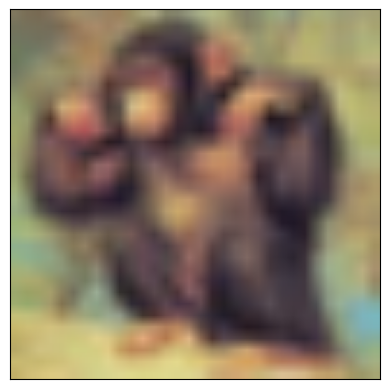

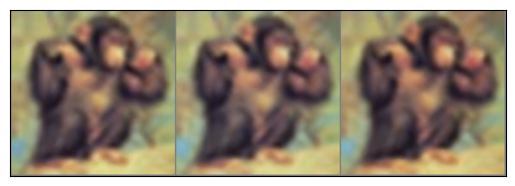

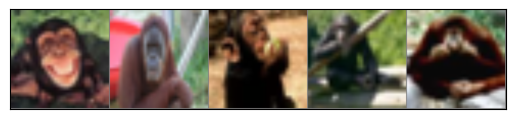

In [202]:
class_seed = 2
# クエリデータセットのインスタンス化
query = function.QueryDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1,query_per_class=15, class_seed=class_seed)



support = function.SupportDataset(root_dir='../data/raw/cifar100/data/', transform=transform, num_classes=5, support_per_class=1, class_seed=class_seed)

class_labels = {class_name + f"-{class_seed}": idx for idx, class_name in enumerate(support.selected_classes)}
aug_data = function.ImageClassificationDataset('../data/processed', class_labels, transform=transform)
support_aug = torch.utils.data.ConcatDataset([support, aug_data])
support_loader = DataLoader(support, batch_size=1, shuffle=False)
aug_loader = DataLoader(aug_data, batch_size=3, shuffle=False)
query_loader = DataLoader(query, batch_size=5, shuffle=False)

wanted_label = 4
for batch in support_loader:
    image, label = batch
    if label[0] == wanted_label:
        imshow(torchvision.utils.make_grid(image))
        break

for batch in aug_loader:
    image, label = batch
    if label[0] == wanted_label:
        imshow(torchvision.utils.make_grid(image))
        break

for batch in query_loader:
    image, label = batch
    if label[0] == wanted_label:
        imshow(torchvision.utils.make_grid(image))
        break